# Задача определения платежеспособности клиента

## Получение и изучение данных

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [3]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data'
data = pd.read_csv(url, header=None, na_values='?')

In [6]:
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260.0,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200.0,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200.0,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280.0,750,-


In [7]:
data.shape

(690, 16)

In [8]:
data.columns = ['A' + str(i) for i in range(1, 16)] + ['class']
data

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,class
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260.0,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200.0,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200.0,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280.0,750,-


In [9]:
data['A5'][687]

'p'

In [10]:
data.describe()  # сводная информация по таблице

,A2,A3,A8,A11,A14,A15
count,678.000000,690.000000,690.000000,690.00000,677.000000,690.000000
mean,31.568171,4.758725,2.223406,2.40000,184.014771,1017.385507
std,11.957862,4.978163,3.346513,4.86294,173.806768,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,22.602500,1.000000,0.165000,0.00000,75.000000,0.000000
50%,28.460000,2.750000,1.000000,0.00000,160.000000,5.000000
75%,38.230000,7.207500,2.625000,3.00000,276.000000,395.500000
max,80.250000,28.000000,28.500000,67.00000,2000.000000,100000.000000


In [12]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']

['A2', 'A3', 'A8', 'A11', 'A14', 'A15']

In [13]:
categorical_columns


['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13', 'class']

In [14]:
data[categorical_columns].describe()

,A1,A4,A5,A6,A7,A9,A10,A12,A13,class
count,678,684,684,681,681,690,690,690,690,690
unique,2,3,3,14,9,2,2,2,3,2
top,b,u,g,c,v,t,f,f,g,-
freq,468,519,519,137,399,361,395,374,625,383


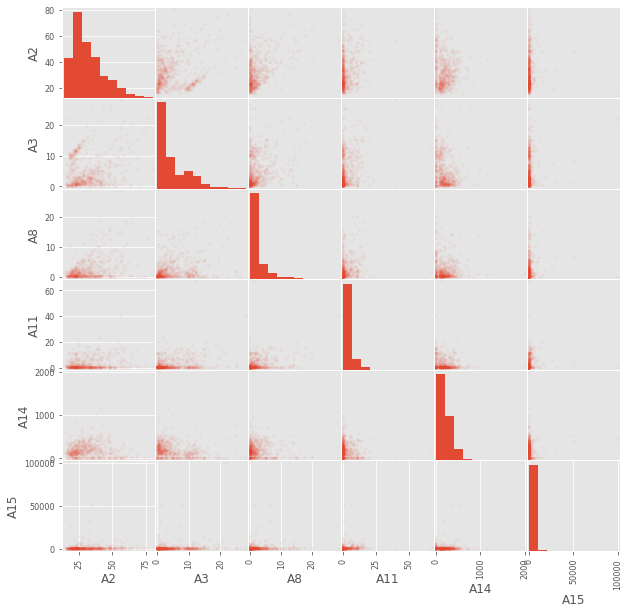

In [16]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha=0.05, figsize=(10, 10));

In [17]:
data.corr()

,A2,A3,A8,A11,A14,A15
A2,1.000000,0.202317,0.395751,0.185912,-0.079812,0.018553
A3,0.202317,1.000000,0.298902,0.271207,-0.224242,0.123121
A8,0.395751,0.298902,1.000000,0.322330,-0.077163,0.051345
A11,0.185912,0.271207,0.322330,1.000000,-0.120096,0.063692
A14,-0.079812,-0.224242,-0.077163,-0.120096,1.000000,0.066853
A15,0.018553,0.123121,0.051345,0.063692,0.066853,1.000000


col1 = 'A2'
col2 = 'A11'

plt.figure(figsize=(10, 6))

plt.scatter(data[col1][data['class'] == '+'],
            data[col2][data['class'] == '+'],
            alpha=0.75,
            color='red',
            label='+')

plt.scatter(data[col1][data['class'] == '-'],
            data[col2][data['class'] == '-'],
            alpha=0.75,
            color='blue',
            label='-')

plt.xlabel(col1)
plt.ylabel(col2)
plt.legend(loc='best');

## Подготовка данных

In [19]:
data.count(axis=0)

A1       678
A2       678
A3       690
A4       684
A5       684
A6       681
A7       681
A8       690
A9       690
A10      690
A11      690
A12      690
A13      690
A14      677
A15      690
class    690
dtype: int64

In [20]:
# варианты избавления от проблемы отсутствия данных в ячейках таблицы
# data = data.dropna(axis=1)   # удалить столбцы с пустыми значениями
# data = data.dropna(axis=0)   # удалить строки с пустыми значениями

In [21]:
# альтернатива - заполнить пропуски
data = data.fillna(data.median(axis=0), axis=0)

In [22]:
data.count(axis=0)

A1       678
A2       690
A3       690
A4       684
A5       684
A6       681
A7       681
A8       690
A9       690
A10      690
A11      690
A12      690
A13      690
A14      690
A15      690
class    690
dtype: int64

In [24]:
# для категориальных признаков - заполняем пропуски самым популярным:
data['A1'].describe()
data['A1'] = data['A1'].fillna('b')

In [25]:
# автоматизируем предыдущий шаг для всех категориальных признаков
data_describe = data.describe(include=[object])
for c in categorical_columns:
    data[c] = data[c].fillna(data_describe[c]['top'])

In [26]:
# проверяем - теперь все элементы заполнены
data.describe(include=[object])

,A1,A4,A5,A6,A7,A9,A10,A12,A13,class
count,690,690,690,690,690,690,690,690,690,690
unique,2,3,3,14,9,2,2,2,3,2
top,b,u,g,c,v,t,f,f,g,-
freq,480,525,525,146,408,361,395,374,625,383


In [27]:
data.describe()

,A2,A3,A8,A11,A14,A15
count,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000
mean,31.514116,4.758725,2.223406,2.40000,183.562319,1017.385507
std,11.860245,4.978163,3.346513,4.86294,172.190278,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,22.670000,1.000000,0.165000,0.00000,80.000000,0.000000
50%,28.460000,2.750000,1.000000,0.00000,160.000000,5.000000
75%,37.707500,7.207500,2.625000,3.00000,272.000000,395.500000
max,80.250000,28.000000,28.500000,67.00000,2000.000000,100000.000000


## Векторизация (Преобразуем категориальные признаки в количественные)

In [28]:
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]

In [29]:
binary_columns

['A1', 'A9', 'A10', 'A12', 'class']

In [30]:
# бинарные признаки просто заменяем на 1 и 0
data.at[data['A1'] == 'b', 'A1'] = 0
data.at[data['A1'] == 'a', 'A1'] = 1
data['A1'].describe()

count     690
unique      2
top         0
freq      480
Name: A1, dtype: int64

In [31]:
# автоматизируем для остальных признаков

for c in binary_columns[1:]:
    top = data_describe[c]['top']
    top_items = data[c] == top
    data.loc[top_items, c] = 0
    data.loc[np.logical_not(top_items), c] = 1

In [32]:
data[binary_columns].describe()

,A1,A9,A10,A12,class
count,690,690,690,690,690
unique,2,2,2,2,2
top,0,0,0,0,0
freq,480,361,395,374,383


In [33]:
# для небинарных признаков применяем метод векторизации
data['A4'].unique()


array(['u', 'y', 'l'], dtype=object)

In [36]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
data_nonbinary.columns

Index(['A4_l', 'A4_u', 'A4_y', 'A5_g', 'A5_gg', 'A5_p', 'A6_aa', 'A6_c',
       'A6_cc', 'A6_d', 'A6_e', 'A6_ff', 'A6_i', 'A6_j', 'A6_k', 'A6_m',
       'A6_q', 'A6_r', 'A6_w', 'A6_x', 'A7_bb', 'A7_dd', 'A7_ff', 'A7_h',
       'A7_j', 'A7_n', 'A7_o', 'A7_v', 'A7_z', 'A13_g', 'A13_p', 'A13_s'],
      dtype='object')

## Нормализация количественных признаков

In [37]:
data_numerical = data[numerical_columns]
data_numerical = (data_numerical - data_numerical.mean()) / data_numerical.std()
data_numerical.describe()

,A2,A3,A8,A11,A14,A15
count,6.900000e+02,6.900000e+02,6.900000e+02,6.900000e+02,6.900000e+02,6.900000e+02
mean,-2.581751e-15,2.085288e-16,1.879334e-16,2.067589e-16,4.827057e-17,-1.448117e-18
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.497787e+00,-9.559198e-01,-6.643947e-01,-4.935286e-01,-1.066043e+00,-1.952717e-01
25%,-7.456942e-01,-7.550425e-01,-6.150897e-01,-4.935286e-01,-6.014412e-01,-1.952717e-01
50%,-2.575087e-01,-4.035072e-01,-3.655762e-01,-4.935286e-01,-1.368388e-01,-1.943120e-01
75%,5.221970e-01,4.919034e-01,1.200038e-01,1.233822e-01,5.136044e-01,-1.193615e-01
max,4.109180e+00,4.668645e+00,7.851932e+00,1.328414e+01,1.054901e+01,1.899821e+01


In [38]:
# соединим все в одну таблицу
data = pd.concat((data_numerical, data[binary_columns], data_nonbinary), axis=1)
data = pd.DataFrame(data, dtype=float)
data

,A2,A3,A8,A11,A14,A15,A1,A9,A10,A12,...,A7_ff,A7_h,A7_j,A7_n,A7_o,A7_v,A7_z,A13_g,A13_p,A13_s
0,-0.057681,-0.955920,-0.290872,-0.287892,0.107077,-0.195272,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,2.289656,-0.060007,0.244013,0.740293,-0.816320,-0.087788,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.591397,-0.855481,-0.216167,-0.493529,0.560065,-0.037117,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-0.310627,-0.646569,0.456175,0.534656,-0.485291,-0.194696,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,-0.956482,0.174015,-0.153415,-0.493529,-0.369140,-0.195272,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,-0.879756,1.069928,-0.290872,-0.493529,0.443914,-0.195272,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
686,-0.745694,-0.805262,-0.066758,-0.082255,0.095462,-0.119649,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
687,-0.528161,1.755924,-0.066758,-0.287892,0.095462,-0.195080,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
688,-1.146192,-0.914740,-0.652442,-0.493529,0.560065,-0.051321,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [39]:
data.shape

(690, 43)

In [40]:
data.columns

Index(['A2', 'A3', 'A8', 'A11', 'A14', 'A15', 'A1', 'A9', 'A10', 'A12',
       'class', 'A4_l', 'A4_u', 'A4_y', 'A5_g', 'A5_gg', 'A5_p', 'A6_aa',
       'A6_c', 'A6_cc', 'A6_d', 'A6_e', 'A6_ff', 'A6_i', 'A6_j', 'A6_k',
       'A6_m', 'A6_q', 'A6_r', 'A6_w', 'A6_x', 'A7_bb', 'A7_dd', 'A7_ff',
       'A7_h', 'A7_j', 'A7_n', 'A7_o', 'A7_v', 'A7_z', 'A13_g', 'A13_p',
       'A13_s'],
      dtype='object')

In [41]:
X = data.drop(('class'), axis=1)  # Выбрасываем столбец 'class'.
y = data['class']
feature_names = X.columns
feature_names

Index(['A2', 'A3', 'A8', 'A11', 'A14', 'A15', 'A1', 'A9', 'A10', 'A12', 'A4_l',
       'A4_u', 'A4_y', 'A5_g', 'A5_gg', 'A5_p', 'A6_aa', 'A6_c', 'A6_cc',
       'A6_d', 'A6_e', 'A6_ff', 'A6_i', 'A6_j', 'A6_k', 'A6_m', 'A6_q', 'A6_r',
       'A6_w', 'A6_x', 'A7_bb', 'A7_dd', 'A7_ff', 'A7_h', 'A7_j', 'A7_n',
       'A7_o', 'A7_v', 'A7_z', 'A13_g', 'A13_p', 'A13_s'],
      dtype='object')

In [42]:
y

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
685    0.0
686    0.0
687    0.0
688    0.0
689    0.0
Name: class, Length: 690, dtype: float64

## Обучающая и тестовая выборки

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 11)

In [45]:
X_train

,A2,A3,A8,A11,A14,A15,A1,A9,A10,A12,...,A7_ff,A7_h,A7_j,A7_n,A7_o,A7_v,A7_z,A13_g,A13_p,A13_s
639,0.342816,-0.805262,-0.216167,-0.493529,0.275496,-0.195272,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
53,0.287168,-0.453727,-0.664395,-0.493529,0.321956,-0.156885,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
329,-0.257509,-0.152411,-0.638995,-0.493529,1.320851,-0.195272,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
596,1.228127,-0.353288,0.045299,1.151567,1.233738,0.602985,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
654,-0.668967,-0.789192,-0.540385,-0.287892,0.095462,-0.193160,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332,0.216343,-0.453727,-0.365576,-0.493529,1.605420,-0.192201,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
269,-1.139447,-0.922775,-0.601643,-0.493529,0.095462,-0.187594,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
337,0.279580,-0.704823,-0.514985,-0.493529,-0.136839,-0.195272,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
91,-0.007935,2.157678,-0.514985,-0.493529,-0.369140,-0.195272,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0





## Алгоритмы машинного обучения

### kNN – метод ближайших соседей

In [54]:
# обучим модель


from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [55]:
# оценим качество построенной модели
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)
print (err_train, err_test) 

0.14699792960662525 0.16908212560386474


In [72]:
# err_train, err_test  - ошибки на тестовой и обучающей выборке
#err_train*100, err_test*100
print('ошибка обучающей выборки: {:.2f}%, ошибка тестовой выборки: {:.2f}%'.format(err_train*100, err_test*100))

ошибка обучающей выборки: 14.70%, ошибка тестовой выборки: 16.91%


In [75]:
# Попробуем уменьшить тестовую ошибку, варьируя параметры метода.
#Основной параметр метода k ближайших соседей – это k
#Поиск оптимальных значений параметров можно осуществить с помощью класса GridSearchCV – 
#поиск наилучшего набора параметров, доставляющих минимум ошибке перекрестного контроля (cross-validation). 
#По умолчанию рассматривается 3-кратный перекрестный контроль.
#Например, найдем наилучшее значение k среди значений [1, 3, 5, 7, 10, 15]:

from sklearn.model_selection import GridSearchCV
n_neighbors_array = [1, 3, 5, 7, 10, 15]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid={'n_neighbors': n_neighbors_array})
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.19465206185567008 5


In [84]:
#В качестве оптимального метод выбрал значение k равное 5.  
#Ошибка перекрестного контроля составила 19.4%, что даже больше ошибки на тестовой выборке для 5 ближайших соседей. 
#Это может быть обусленно тем, что для построения моделей в рамках схемы перекрестного контроля 
#используются не все данные.
#Проверим, чему равны ошибки на обучающей и тестовой выборках при другом значении параметра (например, 7)

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))
print('ошибка обучающей выборки: {:.2f}%, ошибка тестовой выборки: {:.2f}%'.format(err_train*100, err_test*100))

ошибка обучающей выборки: 15.11%, ошибка тестовой выборки: 16.43%


In [85]:
# Итог: метод ближайших соседей на этой задаче дает не слишком удовлетворительные результаты.

### SVC – машина опорных векторов

In [86]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))

print('ошибка обучающей выборки: {:.2f}%, ошибка тестовой выборки: {:.2f}%'.format(err_train*100, err_test*100))

ошибка обучающей выборки: 10.77%, ошибка тестовой выборки: 12.56%


#### Радиальное ядро

In [89]:
# Попробуем уменьшить ошибку с помощью подбора параметров

from sklearn.model_selection import GridSearchCV
C_array = np.logspace(-3, 3, num=7)
gamma_array = np.logspace(-5, 2, num=8)
svc = SVC(kernel='rbf')
grid = GridSearchCV(svc, param_grid={'C': C_array, 'gamma': gamma_array})
grid.fit(X_train, y_train)
print('CV error    = ', 1 - grid.best_score_)
print('best C      = ', grid.best_estimator_.C)
print('best gamma  = ', grid.best_estimator_.gamma)

CV error    =  0.14289089347079043
best C      =  10.0
best gamma  =  0.001


In [90]:
# Посмотрем чему равна ошибка на выборке:
svc = SVC(kernel='rbf', C=grid.best_estimator_.C, gamma=grid.best_estimator_.gamma)
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))
print('ошибка обучающей выборки: {:.2f}%, ошибка тестовой выборки: {:.2f}%'.format(err_train*100, err_test*100))

ошибка обучающей выборки: 14.49%, ошибка тестовой выборки: 11.59%


#### Линейное ядро

In [93]:
C_array = np.logspace(-3, 3, num=7)
svc = SVC(kernel='linear')
grid = GridSearchCV(svc, param_grid={'C': C_array})
grid.fit(X_train, y_train)
print ('CV error    = ', 1 - grid.best_score_)
print ('best C      = ', grid.best_estimator_.C)

CV error    =  0.15118127147766314
best C      =  0.1


In [95]:
svc = SVC(kernel='linear', C=grid.best_estimator_.C)
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))

print('ошибка обучающей выборки: {:.2f}%, ошибка тестовой выборки: {:.2f}%'.format(err_train*100, err_test*100))

ошибка обучающей выборки: 15.11%, ошибка тестовой выборки: 12.56%


####  Полиномиальное ядро

In [96]:
from sklearn.model_selection import GridSearchCV
C_array = np.logspace(-5, 2, num=8)
gamma_array = np.logspace(-5, 2, num=8)
degree_array = [2, 3, 4]
svc = SVC(kernel='poly')
grid = GridSearchCV(svc, param_grid={'C': C_array, 'gamma': gamma_array, 'degree': degree_array})
grid.fit(X_train, y_train)
print ('CV error    = ', 1 - grid.best_score_)
print ('best C      = ', grid.best_estimator_.C)
print ('best gamma  = ', grid.best_estimator_.gamma)
print ('best degree = ', grid.best_estimator_.degree)

CV error    =  0.14289089347079043
best C      =  0.0001
best gamma  =  10.0
best degree =  2


In [97]:
svc = SVC(kernel='poly', C=grid.best_estimator_.C, 
          gamma=grid.best_estimator_.gamma, degree=grid.best_estimator_.degree)
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))

print('ошибка обучающей выборки: {:.2f}%, ошибка тестовой выборки: {:.2f}%'.format(err_train*100, err_test*100))

ошибка обучающей выборки: 9.73%, ошибка тестовой выборки: 12.08%


### Random Forest – случайный лес

In [144]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators=100, random_state=10)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))
print('ошибка обучающей выборки: {:.2f}%, ошибка тестовой выборки: {:.2f}%'.format(err_train*100, err_test*100))

ошибка обучающей выборки: 0.00%, ошибка тестовой выборки: 9.66%


In [99]:
# Отбор значимых признаков:
# Отбор признаков «вручную» (как и «ручной» синтез новых признаков) — важный этап в анализе данных. 
# К сожалению, нам не известны содержательные значения используемых в рассматриваемой задаче признаков, 
# поэтому ограничимся только их автоматическим отбором. Для этого существует много различных алгоритмов. 
# Рассмотрим только один из них – с помощью случайного леса.

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature importances:")
for f, idx in enumerate(indices):
    print("{:2d}. feature '{:5s}' ({:.4f})".format(f + 1, feature_names[idx], importances[idx]))

Feature importances:
 1. feature 'A9   ' (0.2269)
 2. feature 'A8   ' (0.1020)
 3. feature 'A11  ' (0.0816)
 4. feature 'A15  ' (0.0813)
 5. feature 'A3   ' (0.0791)
 6. feature 'A14  ' (0.0730)
 7. feature 'A2   ' (0.0672)
 8. feature 'A10  ' (0.0649)
 9. feature 'A6_x ' (0.0155)
10. feature 'A7_h ' (0.0141)
11. feature 'A12  ' (0.0139)
12. feature 'A1   ' (0.0133)
13. feature 'A7_v ' (0.0122)
14. feature 'A6_q ' (0.0116)
15. feature 'A6_k ' (0.0110)
16. feature 'A5_p ' (0.0104)
17. feature 'A13_g' (0.0100)
18. feature 'A6_w ' (0.0099)
19. feature 'A6_ff' (0.0093)
20. feature 'A5_g ' (0.0087)
21. feature 'A6_c ' (0.0079)
22. feature 'A4_u ' (0.0075)
23. feature 'A4_y ' (0.0071)
24. feature 'A7_bb' (0.0071)
25. feature 'A13_s' (0.0070)
26. feature 'A6_cc' (0.0067)
27. feature 'A6_i ' (0.0059)
28. feature 'A7_ff' (0.0058)
29. feature 'A6_aa' (0.0047)
30. feature 'A6_m ' (0.0037)
31. feature 'A6_e ' (0.0035)
32. feature 'A13_p' (0.0035)
33. feature 'A6_d ' (0.0031)
34. feature 'A7_j ' (0

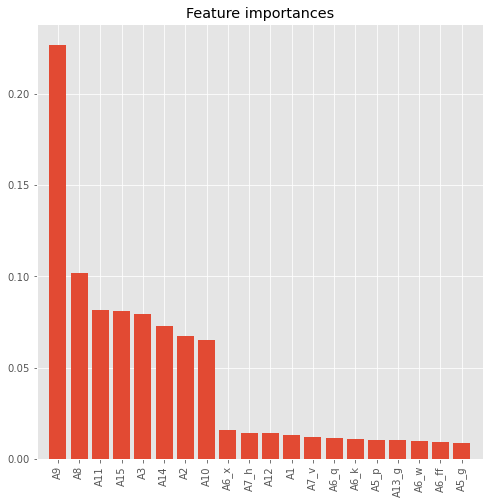

In [100]:
# Построим столбцовую диаграмму, графически представляющую значимость первых 20 признаков:
d_first = 20
plt.figure(figsize=(8, 8))
plt.title("Feature importances")
plt.bar(range(d_first), importances[indices[:d_first]], align='center')
plt.xticks(range(d_first), np.array(feature_names)[indices[:d_first]], rotation=90)
plt.xlim([-1, d_first]);

In [101]:
best_features = indices[:8]
best_features_names = feature_names[best_features]
print(best_features_names)

Index(['A9', 'A8', 'A11', 'A15', 'A3', 'A14', 'A2', 'A10'], dtype='object')


### GBT – градиентный бустинг деревьев решений

In [125]:
from sklearn import ensemble
gbt = ensemble.GradientBoostingClassifier(n_estimators=100, random_state=1)
gbt.fit(X_train, y_train)

err_train = np.mean(y_train != gbt.predict(X_train))
err_test = np.mean(y_test != gbt.predict(X_test))
print('ошибка обучающей выборки: {:.2f}%, ошибка тестовой выборки: {:.2f}%'.format(err_train*100, err_test*100))

ошибка обучающей выборки: 0.83%, ошибка тестовой выборки: 9.66%


In [117]:
# При использовании только значимых признаков:

gbt = ensemble.GradientBoostingClassifier(n_estimators=100, random_state=11)
gbt.fit(X_train[best_features_names], y_train)

err_train = np.mean(y_train != gbt.predict(X_train[best_features_names]))
err_test = np.mean(y_test != gbt.predict(X_test[best_features_names]))

print('ошибка обучающей выборки: {:.2f}%, ошибка тестовой выборки: {:.2f}%'.format(err_train*100, err_test*100))

ошибка обучающей выборки: 3.52%, ошибка тестовой выборки: 10.63%
